<a href="https://colab.research.google.com/github/jrmesquita7/TreinamentoCustomizadoYOLOv4/blob/main/YOLOv4_Treinamento_do_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLOv4 - Como fazer o treinamento do detector personalizado

Para realizar o treinamento é necessário que você primeiro tenha coletado as imagens do conjunto de treinamento e criado o seu dataset

Só lembrando que o conjunto de imagens para fazer o treinamento do detector customizado do YOLO deve conter:

* Imagens dos objetos que queremos reconhecer, já catalogadas (com os arquivos annotation)
* Arquivos obj.data e obj.names
* Arquivo .cfg customizado
* Arquivo train.txt (test.txt é opcional)

Se estiver com todos esses arquivos tudo ok então pode continuar executando as etapas desse Colab.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
print(device_name)

In [ ]:
!pip install pytesseract
!apt install tesseract-ocr
!apt install libtesseract-dev

## Etapa 1 - Conectando com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
!ln -s /content/gdrive/My\ Drive/TreinamentoCustomizadoYOLO/ /TreinamentoCustomizadoYOLO

In [ ]:
ls /TreinamentoCustomizadoYOLO/

## Etapa 2 - Download do Darknet

Primeiramente vamos clonar o repositório do darknet (por AlexeyAB, o mais atualizado atualmente), que contém todos os arquivos e ferramentas necessárias para fazer o treinamento do modelo.

In [ ]:
!git clone https://github.com/AlexeyAB/darknet

In [ ]:
%cd darknet
!ls

## Etapa 3 - Compilando a biblioteca

Para compilar com suporte a GPU/CUDA iremos modificar o arquivo Makefile para definir algumas variáveis como ativado (de 0 para 1) -> OPENCV, GPU e CUDNN. Ao invés de abrir o arquivo em um editor de texto podemos fazer essa alteração com o comando `sed`.

In [ ]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

In [ ]:
!make

## Etapa 4 - Preparando o YOLO

### 4.1 - Baixando os pesos do modelo pré-treinado

In [ ]:
ls /TreinamentoCustomizadoYOLO/

In [ ]:
!unzip /TreinamentoCustomizadoYOLO/obj.zip -d ./data/

In [ ]:
!unzip /TreinamentoCustomizadoYOLO/valid.zip -d ./data/

In [ ]:
!cp /TreinamentoCustomizadoYOLO/yolov4_custom.cfg ./cfg/
!cp /TreinamentoCustomizadoYOLO/obj.names ./data
!cp /TreinamentoCustomizadoYOLO/obj.data ./data
!cp /TreinamentoCustomizadoYOLO/train.txt ./data
!cp /TreinamentoCustomizadoYOLO/test.txt ./data

In [ ]:
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137

# **Treinando o modelo**

In [ ]:
ls

In [ ]:
cd /content/darknet

In [ ]:
cd

In [1]:
ls

sample_data/


In [ ]:
!./darknet detector train data/obj.data cfg/yolov4_custom.cfg /TreinamentoCustomizadoYOLO/yolov4_custom_last.weights -dont_show -map

In [ ]:
!./darknet detector train data/obj.data cfg/yolov4_custom.cfg /TreinamentoCustomizadoYOLO/yolov4_custom_2000.weights -dont_show -map

/bin/bash: ./darknet: Is a directory


# Verificando o mAP (Mean Average Precision) do modelo

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4_custom.cfg /TreinamentoCustomizadoYOLO/yolov4_custom_last.weights

/bin/bash: ./darknet: Is a directory


# Testando o modelo treinado

In [ ]:
cd /content/darknet

In [ ]:
ls

In [ ]:
!./darknet detector test data/obj.data cfg/yolov4_custom.cfg /TreinamentoCustomizadoYOLO/yolov4_custom_last.weights /TreinamentoCustomizadoYOLO/placas/20.jpg -thresh 0.10

In [ ]:
import cv2
import matplotlib.pyplot as plt

def mostrar(caminho):
  img = cv2.imread(caminho)
  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.show()

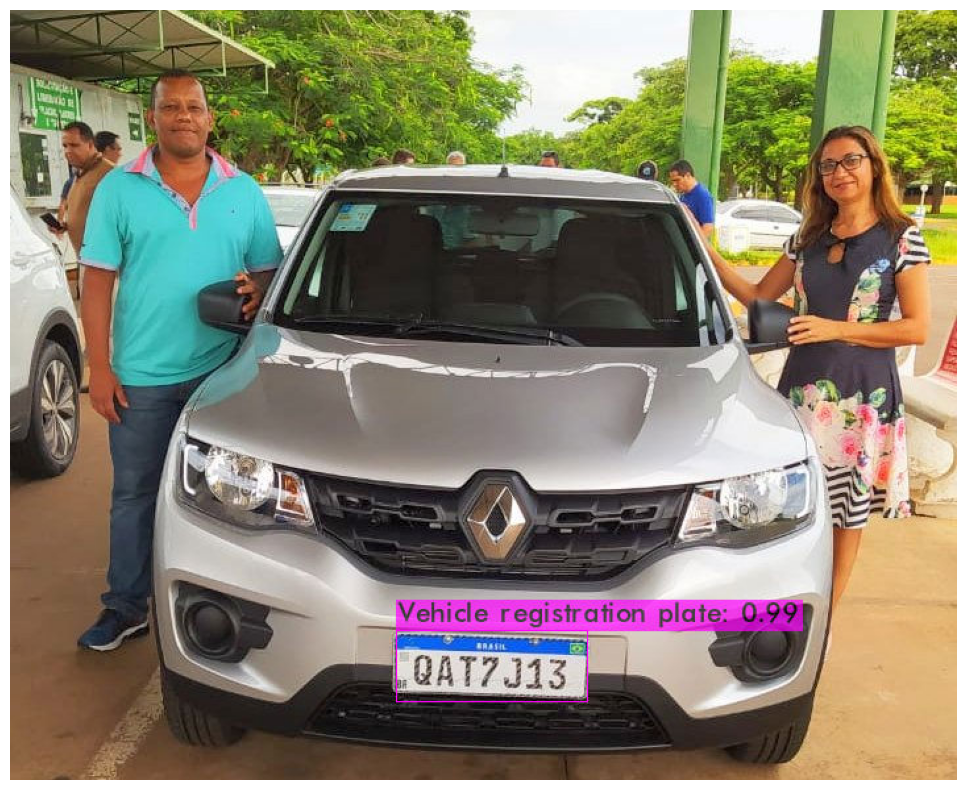

In [ ]:
mostrar('predictions.jpg')

In [ ]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'


In [ ]:
# Carregar a imagem
image = cv2.imread('/content/p18.png')

# Converter a imagem para escala de cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Realizar a segmentação de caracteres usando o Tesseract OCR
letters = pytesseract.image_to_string(gray, config='--psm 7')

# Remover espaços em branco e caracteres especiais
letters = ''.join(filter(str.isalnum, letters))

# Imprimir o resultado
print('Letras da placa:', letters)

Letras da placa: CKDaoe
